# Notebook 1: Why is Machine Learning difficult?

## Overview 

In this notebook, we will get our hands dirty trying to gain intuition about why machine learning is difficult. 

Our task is going to be a simple one, fitting data with polynomials of different order. Formally, this goes under the name of polynomial regression. Here we will do a series of exercises that are intended to give the reader intuition about the major challenges that any machine learning algorithm faces.

## Learning Goal

We will explore how our ability to predict depends on the number of data points we have, the "noise" in the data, and our knowledge about relevant features. The goal is to build intuition about why prediction is difficult and discuss general strategies for overcoming these difficulties.


## The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation
$$
    y_i= f(x_i) + \eta_i,
$$
where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that
$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$
We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make prediction, we will consider a family of functions $g_\alpha(x;\theta_\alpha)$ that depend on some parameters $\theta_\alpha$. These functions respresent the **model class** that we are using to try to model the data and make predictions. The $g_\alpha(x;\theta_\alpha)$ encode the class of **features** we are using to represent the data.

To learn the parameters $\boldsymbol{\theta}$, we will train our models on a **training data set** and then test the effectiveness of the model on a <i>different</i> dataset, the **test data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen. As we will see below, models that give the best fit to the training data do not necessarily make the best predictions on the test data. This will be a running theme that we will encounter repeatedly in machine learning.  


For the remainder of the notebook, we will focus on polynomial regression. Our task is to model the data with polynomials and make predictions about the new data that we have not seen.
We will consider two qualitatively distinct situations: 
<ul>
<li> In the first case, the process that generates the underlying data is in the model class we are using to make predictions. For polynomial regression, this means that the functions $f(x_i)$ are themselves polynomials.
<li>In the second case, our data lies outside our model class. In the case of polynomial regression, this could correspond to the case where the $f(x_i)$ is a 10-th order polynomial but $g_\alpha(x;\theta_\alpha)$ are polynomials of order 1 or 3.
</ul>

In the exercises and discussion we consider 3 model classes:
<ul>
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 1 (linear models),
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 3,
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 10.
</ul>

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$
We will return to this in later notebooks. For now, we will try to get a qualitative picture by examining plots on test and training data.

## Fitting vs. predicting when the data is in the model class


We start by considering the case:
$$
f(x)=2x.
$$
Then the data is clearly generated by a model that is contained within all three model classes we are using to make predictions (linear models, third order polynomials, and tenth order polynomials). 


Run the code for the following cases:
<ul> 
<li> For $f(x)=2x$, $N_{\mathrm{train}}=10$ and $\sigma=0$ (noiseless case), train the three classes of models (linear, third-order polynomial, and tenth order polynomial) for a training set when $x_i  \in [0,1]$. Make graphs comparing fits for different order of polynomials. Which model fits the data the best?
<li> Do you think that the data that has the least error on the training set will also make the best predictions? Why or why not? Can you try to discuss and formalize your intuition? What can go right and what can go wrong?
<li>Check your answer by seeing how well your fits predict newly generated test data (including on data outside the range you fit on, for example $x \in [0,1.2]$) using the code below. How well do you do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=10$, and $\sigma=1$. What changes?
<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=100$, and $\sigma=1$. What changes?
<li> Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.
</ul>


## Fitting vs. predicting when the data is not in the model class
Thus far, we have considered the case where the data is generated using a model contained in the model class. Now consider  $f(x)=2x-10x^5+15x^{10}$. *Notice that the for linear and third-order polynomial the true model $f(x)$ is not contained in model class $g_\alpha(x)$* .

<ul>
<li> Repeat the exercises above fitting and predicting for $f(x)=2x-10x^5+15x^{10}$ for $N_{\mathrm{train}}=10,100$ and $\sigma=0,1$. Record your observations.
<li> Do better fits lead to better predictions?
<li> What is the relationship between the true model for generating the data and the model class that has the most predictive power? How is this related to the model complexity? How does this depend on the number of data points $N_{\mathrm{train}}$ and $\sigma$?
<li> Summarize what you think you learned about the relationship of knowing the true model class and predictive power.


# Training the models:

In [51]:
#This is Python Notebook to walk through polynomial regression examples
#We will use this to think about regression
import numpy as np
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

## Training over different true functions, models, and noise

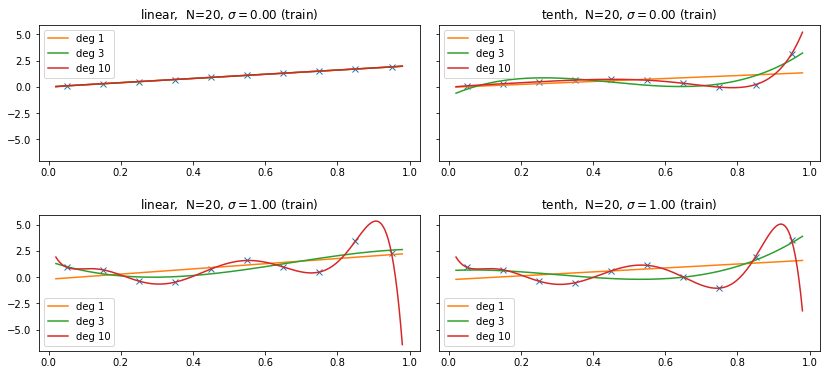

In [61]:
sigma_train_list = [0.001, 1]
fig, ax_list = plt.subplots(ncols=2, nrows=len(sigma_train_list), sharey=True, figsize=(14, 6))
N_train = int(1e1)
x = np.linspace(0.05, 0.95, N_train)
xplot = np.linspace(0.02, 0.98, 200) # grid of points, some are in the training set, some are not

for row, sigma_train in enumerate(sigma_train_list):
    # Train on integers
    # Draw Gaussian random noise
    s = sigma_train * np.random.randn(N_train)

    y_data_dict = {"linear": 2 * x + s, "tenth": 2 * x - 10 * x**5 + 15 * x**10 +s}

    fit_dict = dict()

    poly_degrees = [3, 10]

    for fig_count, (model, y) in enumerate(y_data_dict.items()):
        ax = ax_list[row][fig_count]
        # Linear Regression : create linear regression object
        clf = linear_model.LinearRegression()
        clf.fit(x[:, np.newaxis], y)

        fit_dict[1] = clf
        ax.plot(x, y, "x")
        # Use fitted linear model to predict the y value:
        y_pred = clf.predict(xplot[:, np.newaxis])
        linear_plot = ax.plot(xplot, y_pred, label='deg 1')

        for deg in poly_degrees:
            poly_features = PolynomialFeatures(deg)
            X = poly_features.fit_transform(x[:, np.newaxis])
            clf = linear_model.LinearRegression()
            clf.fit(X, y)
            fit_dict[deg] = clf
            Xplot = poly_features.fit_transform(xplot[:,np.newaxis])
            poly_plot = ax.plot(xplot, clf.predict(Xplot), label='deg {}'.format(deg))

        Title="%s,  N=%i, $\sigma=%.2f$"%(model, N_test, sigma_train)
        ax.set_title(Title+" (train)")
        ax.legend()
fig.subplots_adjust(wspace=0.05, hspace=0.4)

In [60]:
# np.linalg.pinv(PolynomialFeatures(1).fit_transform(x[:, np.newaxis])) @ y

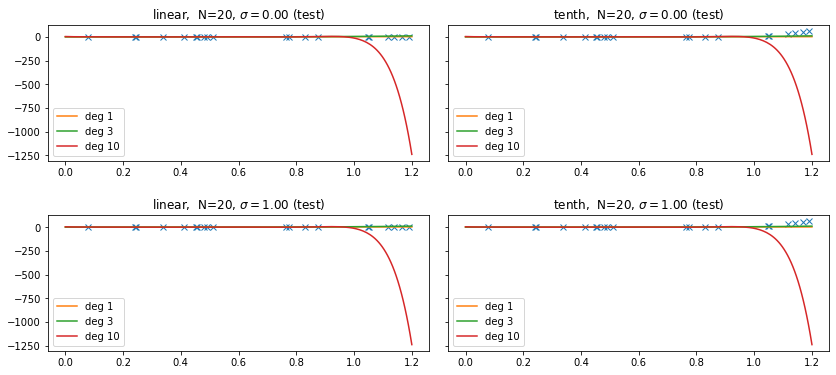

In [62]:
N_test = 20
max_x = 1.2
x_test = max_x * np.random.random(N_test)
x_plot = np.linspace(0, max_x, 200)


fig, ax_list = plt.subplots(ncols=2, nrows=len(sigma_train_list), sharey=True, figsize=(14, 6))

for row, sigma_test in enumerate(sigma_train_list):
    
    s = sigma_test * np.random.randn(N_test)
    y_data_dict = {"linear": 2 * x_test + s, "tenth": 2 * x_test - 10 * x_test**5 + 15 * x_test**10 +s}
    
    for fig_count, (model, y) in enumerate(y_data_dict.items()):
        ax = ax_list[row][fig_count]
        ax.plot(x_test, y, "x")
        
        for deg, clf in fit_dict.items():
            if deg > 1:
                X_test = PolynomialFeatures(deg).fit_transform(x_plot[:, np.newaxis])
                ax.plot(x_plot, clf.predict(X_test), label="deg {}".format(deg))
            else:
                ax.plot(x_plot, clf.predict(x_plot[:, np.newaxis]), label="deg {}".format(deg))
                
        Title="%s,  N=%i, $\sigma=%.2f$"%(model, N_test, sigma_test)
        ax.set_title(Title+" (test)")
        ax.legend()
        #ax.set_ylim(-50, 200)
fig.subplots_adjust(wspace=0.05, hspace=0.4)

## Observations

- Nice tool called PolynomialFeatures to get feature matrix for a given polynomial degree. Model parameters can be obtained from matrix inversion
- Complex models "overfit" when training size is small. Also do poorly outside fit range. Therefore simple models although far from reality may do better when limited data is present
